# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [110]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.metrics import accuracy_score
%matplotlib inline

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

Из домашнего задания: $$ \mathsf{E}(\xi | \mathcal{G}) = \dfrac{e^\lambda(\lambda (n - 1) + 1) - \lambda n - 1}{\lambda(e^\lambda - 1)},$$ 

и, совершенно аналогично:

$$\mathsf{E}(\xi^2 | \mathcal{G}) = \dfrac{e^\lambda (\lambda (n-1)(\lambda(n-1) + 2) + 2) - \lambda n(\lambda n + 2) - 2 }{\lambda^2 (e^\lambda - 1)}$$

In [111]:
def UMO_x(n, lambd):
    return (np.exp(lambd) * (lambd * (n - 1) + 1) - lambd * n - 1) / (lambd * (np.exp(lambd) - 1))

def UMO_sqr_x(n, lambd):
    up = np.exp(lambd) * (lambd * (n - 1) * (lambd * (n - 1) + 2) + 2) - lambd * n * (lambd * n + 2) - 2
    return up / (lambd**2 * (np.exp(lambd) - 1))

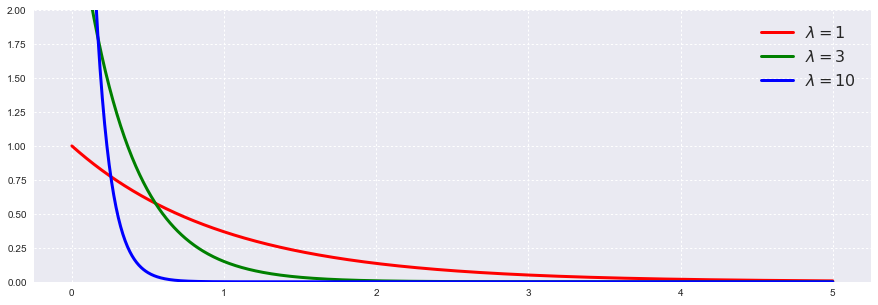

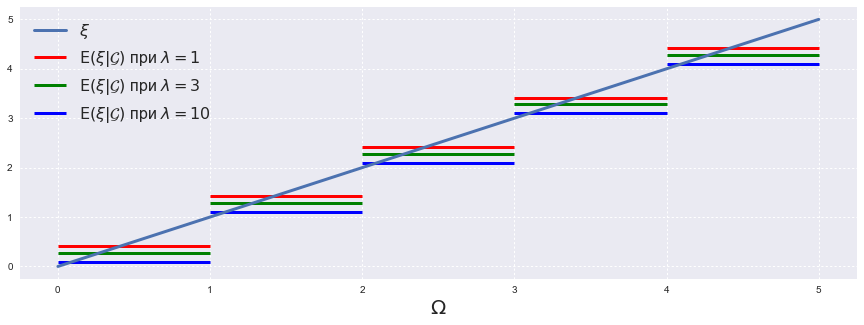

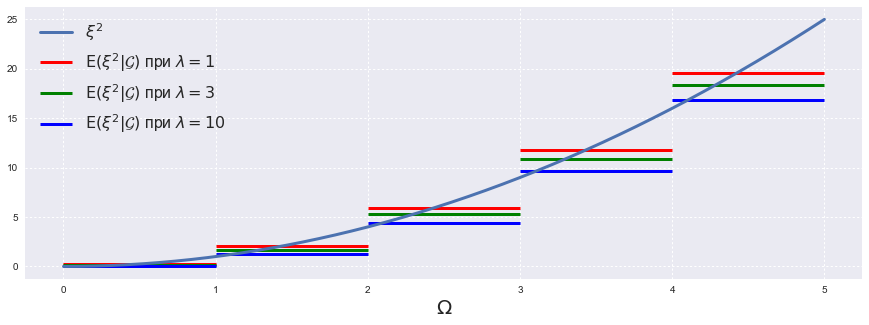

In [112]:
lambdas_array = [1, 3, 10]
colors = ['red', 'green', 'blue']
omega = np.linspace(0, 5, 1000)

plt.figure(figsize=(15, 5))
for l, color in zip(lambdas_array, colors):
    # График 1
    plt.plot(omega, sps.expon.pdf(x=omega, scale=1/l), lw=3, 
             color=color, label='$\\lambda={}$'.format(l))
    plt.legend(fontsize=16)
    plt.ylim((0, 2))
    plt.grid(ls=':')
plt.show()
    
# График 2    
plt.figure(figsize=(15, 5))  
plt.plot(omega, omega, lw=3, label='$\\xi$')
for l, color in zip(lambdas_array, colors):  
    for i in [n for n in range(1, 6)]:  # события из сигма-алгебры
        plt.hlines(UMO_x(i, l), i - 1, i, color=color, lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()
    
# График 3
plt.figure(figsize=(15, 5))  
plt.plot(omega, omega**2, lw=3, label='$\\xi^2$')
for l, color in zip(lambdas_array, colors):  
    for i in [n for n in range(1, 6)]:  # события из сигма-алгебры
        plt.hlines(UMO_sqr_x(i, l), i - 1, i, color=color, lw=3,
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
На последних двух графиках мы показали справедливость утверждения для значения УМО при некотором условии от счетного разбиения. Получили, что умо имеет константное значении на интервалах.

Понятно, что умо -- это усредние, таким образом мы проверили свойство  ${\sf E}({\sf E}(\xi | G)) = {\sf E}\xi $

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

$f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{p_{(\xi_1, \xi_2)} (x, y)}{p_{\xi_2}(y)}$.

Знаем, что $p_{(\xi_1, \xi_2)} (x, y) = \frac{1}{2 \pi | \Sigma | ^ {\frac{1}{2}}}  e^{-\frac{1}{2} (\overline{x} - \mu)^{T} \Sigma^{-1} (\overline{x} - \mu)} = \frac{1}{12 \pi} e^{-\frac{1}{36}(5x^2 - 8xy + 5y^2)}$

Тогда: $p_{\xi_2}(y) = \int_{-\infty}^{\infty}p_{(\xi_1, \xi_2)} (x, y) dx = \frac{1}{2\sqrt{5\pi}} e ^ {-\frac{1}{20}y^2}$

И в итоге: $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{1}{6} \sqrt{\frac{5}{\pi}} e^{-\frac{5}{36}x^2 + \frac{2}{9}xy - \frac{4}{45}y^2}$

In [57]:
def cond_pdf(x, y):
    return 1/6 * np.sqrt(5 / np.pi) * np.exp(-5/36 * x**2 + 2/9 * x*y - 4/45 * y**2)

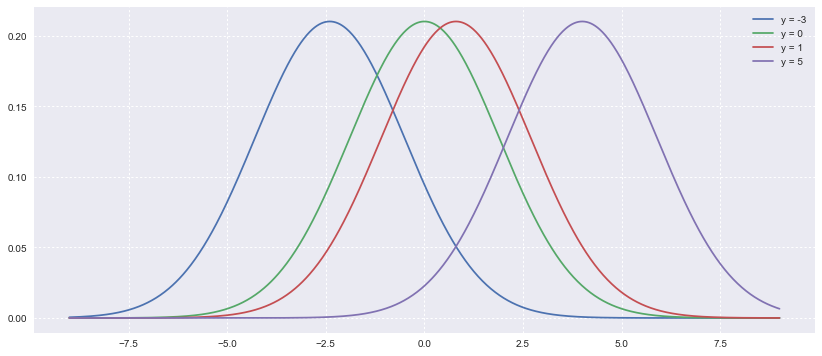

In [58]:
x = np.linspace(-9, 9, 1000)
plt.figure(figsize=(14, 6))
for y in [-3, 0, 1, 5]:
    plt.plot(x, cond_pdf(x, y), label="y = {0}".format(y))
plt.legend(loc="best")
plt.grid(ls=':')
plt.show()

**Вывод:** После посторения этих графков, сразу становится видно, что $ \mathsf{E}(X_1 | X_2 = y)$ имеет нормальное распределение с одной и той же дисперсией.

Из теоретического домашнего задания, $\xi_1, \xi_2 \sim \mathcal{N}(0, 10)$

$$\mathsf{E} (\xi_1 | \xi_2) = \sf E (\alpha \xi_2 + Z | \xi_2)$$

Причем $cov (Z, \xi_2) = cov(\xi_1 - \alpha \xi_2, \xi_2) = 0$. Отсюда получаем $\alpha = 0.8$

$$Z = \xi_1 - 0.8\xi_2$$



Проверим это при $y = 5$: из нашей матрицы ковариаций получаем, что $\sigma_1^2 = 10,  \sigma_2^2 = 10, p = \frac{4}{5}$. Далее

$$\mathsf{E} (\xi_1 | \xi_2) = 0.8\xi_2 + \sf E Z = 0.8\xi_2$$

что и показал нам график выше)

Их дисперсия равна 18/5 (из функции условной плотности). Проверим и это

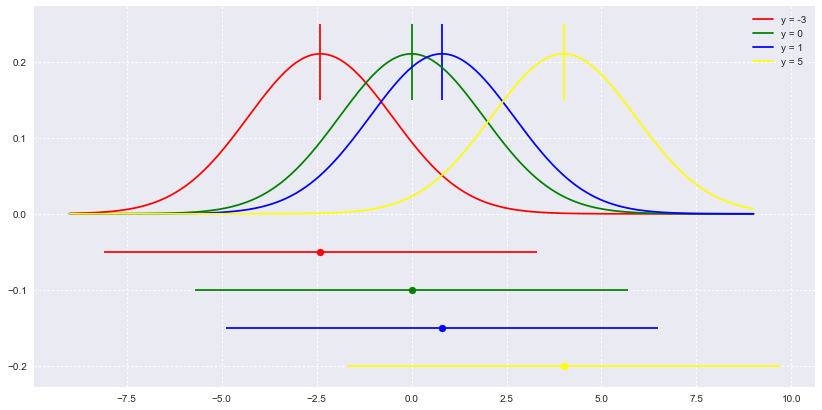

In [107]:
x = np.linspace(-9, 9, 1000)
plt.figure(figsize=(14, 7))
colors = ['red', 'green', 'blue', 'yellow']
for i, y in enumerate([-3, 0, 1, 5]):
    plt.plot(x, cond_pdf(x, y), label="y = {0}".format(y), color=colors[i])
    plt.vlines(4/5*y, 0.15, 0.25, color=colors[i])
    plt.hlines(-(i+1)*0.05, 4/5*y-3*np.sqrt(18/5), 4/5*y+3*np.sqrt(18/5), color=colors[i])
    plt.scatter(4/5*y, -(i+1)*0.05, color=colors[i])
plt.legend(loc="best")
plt.grid(ls=':')
plt.show()

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

$\mathsf{E}( N_t | N_s) = \mathsf{E}(N_s + N_t - N_s | N_s) = N_s + \mathsf{E}( N_t - N_s) = N_s + \lambda(t-s)$

In [108]:
lambd = 1/4
t = 100
sample = sps.expon.rvs(size=10, scale=1/lambd)
while np.sum(sample) < 120:
    sample = np.concatenate([sample, sps.expon.rvs(size=10, scale=1/lambd)])

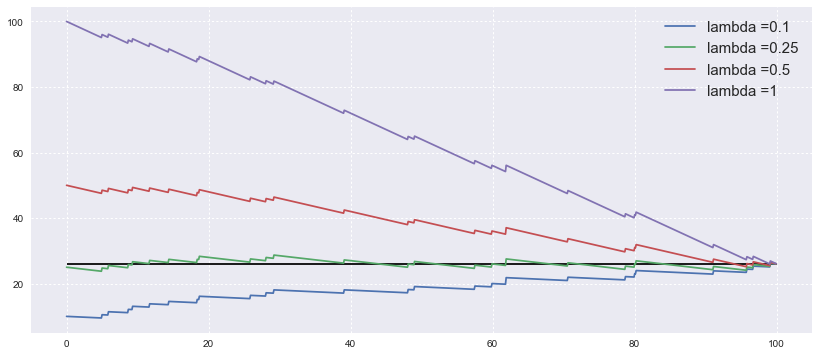

In [109]:
s = np.linspace(0, t, 1000, endpoint=False)
N_s = np.array(list(map(lambda s_once: len(sample[np.cumsum(sample) <= s_once]), s)))
plt.figure(figsize=(14, 6))
for lambd_iter in [1/10, 1/4, 1/2, 1]:
    plt.plot(s, N_s + lambd_iter*(t - s), label='lambda ={0}'.format(lambd_iter))
plt.hlines(len(sample[np.cumsum(sample) <= 100]), 0, 100)
plt.legend(loc='best', fontsize=15)
plt.grid(ls=':')
plt.show()

**Вывод:** В чем была адача? Для любого времени $s < t = 100$ мы нагенерили истоинное значение количества поломанных серверов к этому моменту. Далее мы хотим предсказывать количество серверов, которые сломаются к моменту времени $t = 100$. Но с чем мы будем сравнивать? Конечно, с истинной оценкой, которую мы уже нагенерили.

Действительно проверили, что условное матожидание при $\lambda = \frac{1}{4}$ приближает истинное значение количества поломанных серверов в момент времени $t$. Наша формула с умо может достаточно точно предсказать количество поломанных серверов даже на 100 единиц времени вперед! 

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [61]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']  # выборка
y = data['target']  # номера компонент смеси

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [62]:
sample_0, sample_1, sample_2 = X[y == 0], X[y == 1], X[y == 2]
mean_0, mean_1, mean_2 = np.mean(sample_0, axis=0), np.mean(sample_1, axis=0), np.mean(sample_2, axis=0)
cov_0, cov_1, cov_2 = np.cov(sample_0.T), np.cov(sample_1.T), np.cov(sample_2.T)
gauss_0 = sps.multivariate_normal(mean=mean_0, cov=cov_0)
gauss_1 = sps.multivariate_normal(mean=mean_1, cov=cov_1) 
gauss_2 = sps.multivariate_normal(mean=mean_2, cov=cov_2)
print('\nТип 0\nmean_0 = ', mean_0, '\n\ncov_matrix_0 = \n', cov_0)
print('\nТип 1\nmean_1 = ', mean_1, '\n\ncov_matrix_1 = \n', cov_1)
print('\nТип 2\nmean_2 = ', mean_2, '\n\ncov_matrix_2 = \n', cov_2)


Тип 0
mean_0 =  [ 5.006  3.418  1.464  0.244] 

cov_matrix_0 = 
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]

Тип 1
mean_1 =  [ 5.936  2.77   4.26   1.326] 

cov_matrix_1 = 
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]

Тип 2
mean_2 =  [ 6.588  2.974  5.552  2.026] 

cov_matrix_2 = 
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


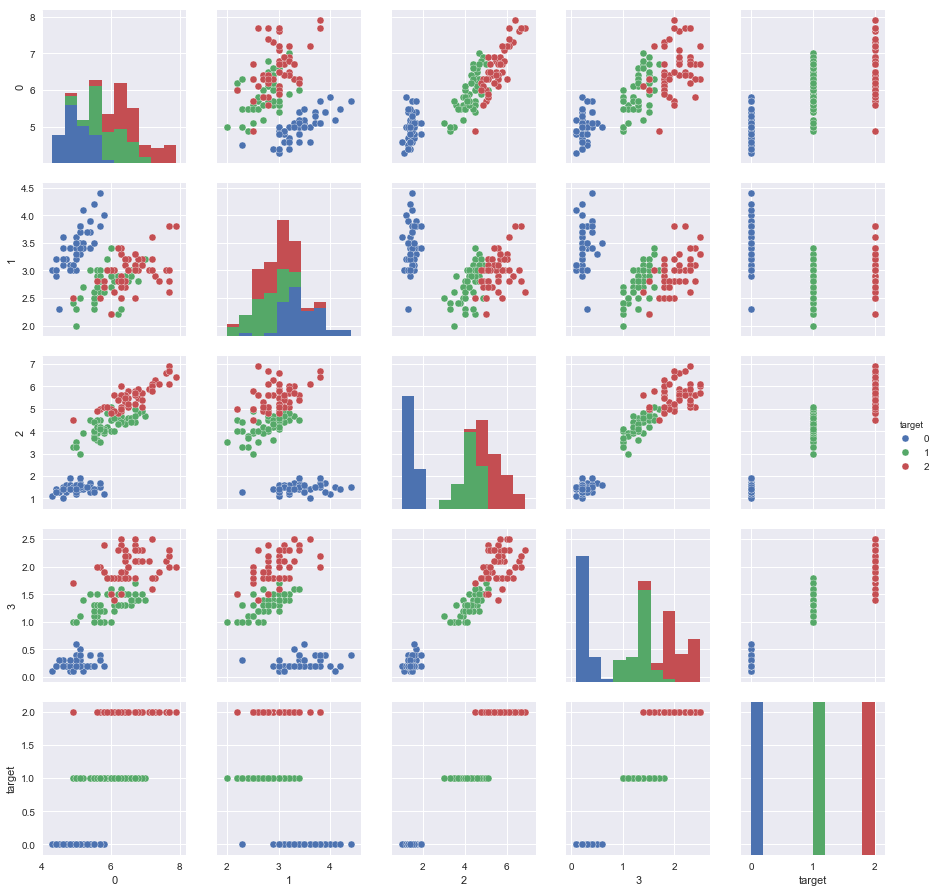

In [63]:
df_data = pd.DataFrame(data['data'])
df_data['target'] = data['target']
sns.pairplot(df_data, hue='target')

Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

In [64]:
def get_two_dim_density(mean, cov, ind_1, ind_2):
    mean_two_dim = mean[[ind_1, ind_2]]
    cov_two_dim = np.array([ [ cov[ind_1][ind_1], cov[ind_1][ind_2] ], 
                            [cov[ind_2][ind_1], cov[ind_2][ind_2] ] ])
    return (mean_two_dim, cov_two_dim)

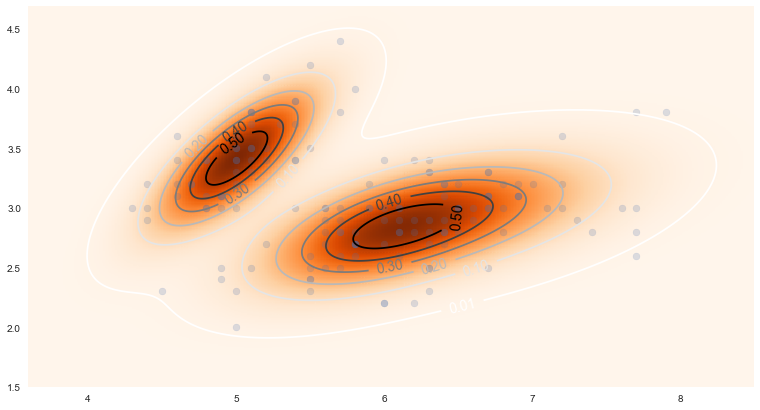

In [65]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3.6:8.5:1e-2, 1.5:4.7:1e-2]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
gauss_0_two_dim = sps.multivariate_normal(*get_two_dim_density(mean_0, cov_0, *I))
gauss_1_two_dim = sps.multivariate_normal(*get_two_dim_density(mean_1, cov_1, *I))
gauss_2_two_dim = sps.multivariate_normal(*get_two_dim_density(mean_2, cov_2, *I))
density = 1/3 * (gauss_0_two_dim.pdf(pos) + gauss_1_two_dim.pdf(pos) + gauss_2_two_dim.pdf(pos))
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

$$\mathsf{E}(X | I(T \neq r)) = \frac{{\sf E} X I\{T = r\} }{\mathsf{P}(T = r)} I\{T = r\} + \frac{{\sf E} X I\{T \neq r\} }{\mathsf{P}(T\neq r)} I\{T \neq r\} = \\
    = 3 {\sf E} X I\{T = r\} (1 - I\{T \neq r\}) + \frac{3}{2} \left( {\sf E} X I\{T = r\} + {\sf E} X I\{T = r\}\right) I\{T \neq r\} $$
   
   Введем матожидания компонент смеси как  $\mu_p, \mu_q, \mu_r$
   
   где $\{p, q, r\} = \{1, 2 ,3\}$

Далее:

 $$\mathsf{E} (X | I\{T \neq r\} = 1) = \frac{1}{2} (\mu_p + \mu_q)$$ -- среднее арифметическое матожиданий двух других компонент

Тогда и условная плотность:
$p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right) = \frac{p_{X|I\{T = k\}}\left(x \left| 2\right.\right) + p_{X|I\{T = k\}}\left(x \left| 3\right.\right)}{2}$ -- среднее арифметическое плотностей двух других копонент

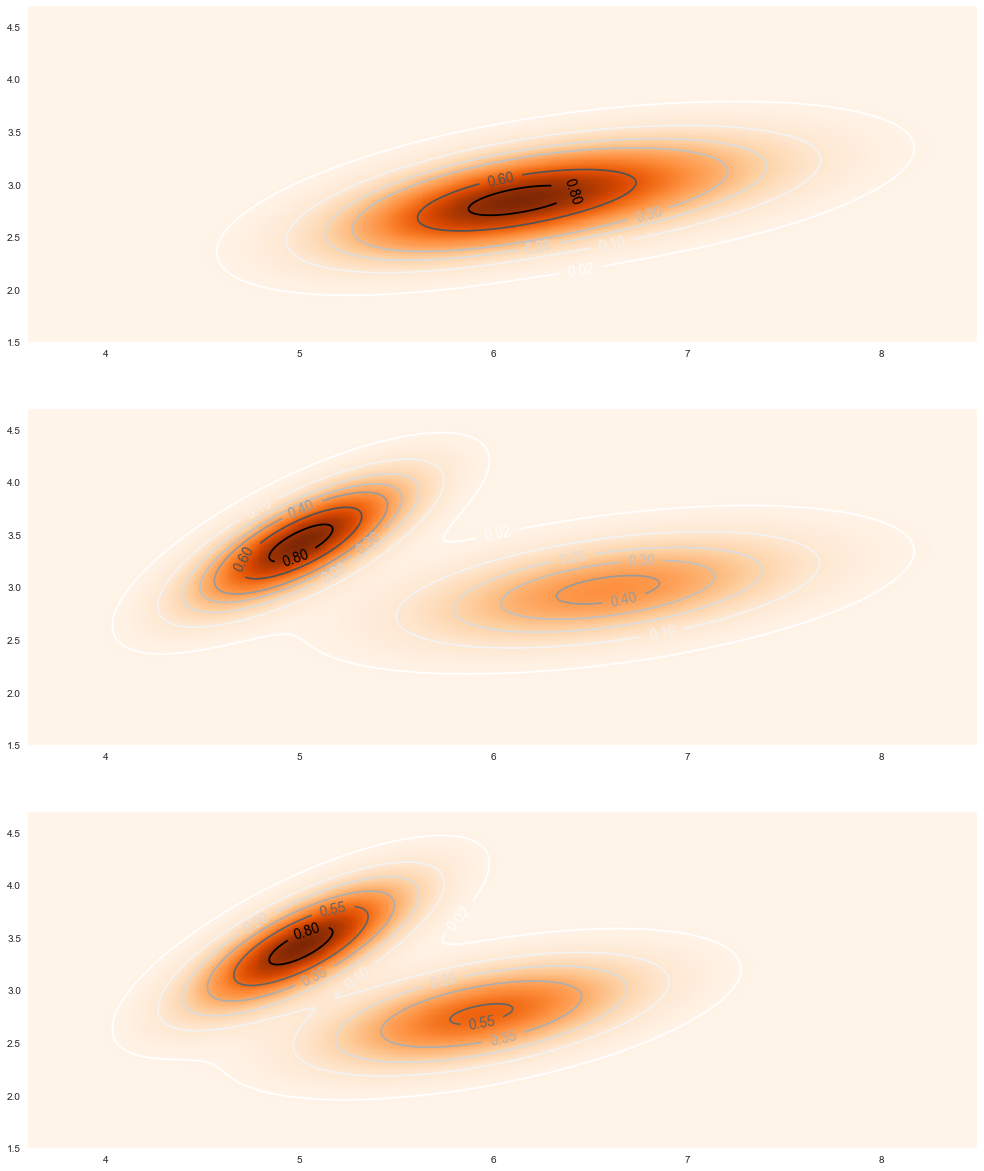

In [78]:
grid = np.mgrid[3.6:8.5:1e-2, 1.5:4.7:1e-2]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
density_0 = 1/2 * (gauss_1_two_dim.pdf(pos) + gauss_2_two_dim.pdf(pos))
density_1 = 1/2 * (gauss_0_two_dim.pdf(pos) + gauss_2_two_dim.pdf(pos))
density_2 = 1/2 * (gauss_0_two_dim.pdf(pos) + gauss_1_two_dim.pdf(pos))
plt.figure(figsize=(17, 21))
boards = ([0.02, 0.1, 0.2, 0.3, 0.6, 0.8], 
          [0.02, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8], 
          [0.02, 0.1, 0.2, 0.35, 0.55, 0.8])
for i, zip_ in enumerate(zip([density_0, density_1, density_2], boards)):
    density, board = zip_
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
#     plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    CS = plt.contour(grid[0], grid[1], density, board)
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [67]:
get_argmax_k = lambda x: np.argmax(np.array([gauss_0.pdf(x), gauss_1.pdf(x), gauss_2.pdf(x)]))

In [68]:
y_pred = np.array(list(map(lambda x: get_argmax_k(x), X)))
accuracy_score(y_pred, y)

0.97999999999999998

In [69]:
def get_image(grid, densuty_1, densuty_2, densuty_3):
    pos = np.empty(grid[0].shape + (2,))
    pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
    colors = np.array(list(map(lambda x:  np.argmax(x), 
                               np.hstack((densuty_1.pdf(pos).reshape(-1, 1), 
                                          densuty_2.pdf(pos).reshape(-1, 1), 
           densuty_3.pdf(pos).reshape(-1, 1))))))
    return colors.reshape(grid[0].shape)

In [70]:
def get_bounds(X_1, X_2):
    return [np.min(X_1), np.max(X_1), np.min(X_2), np.max(X_2)]

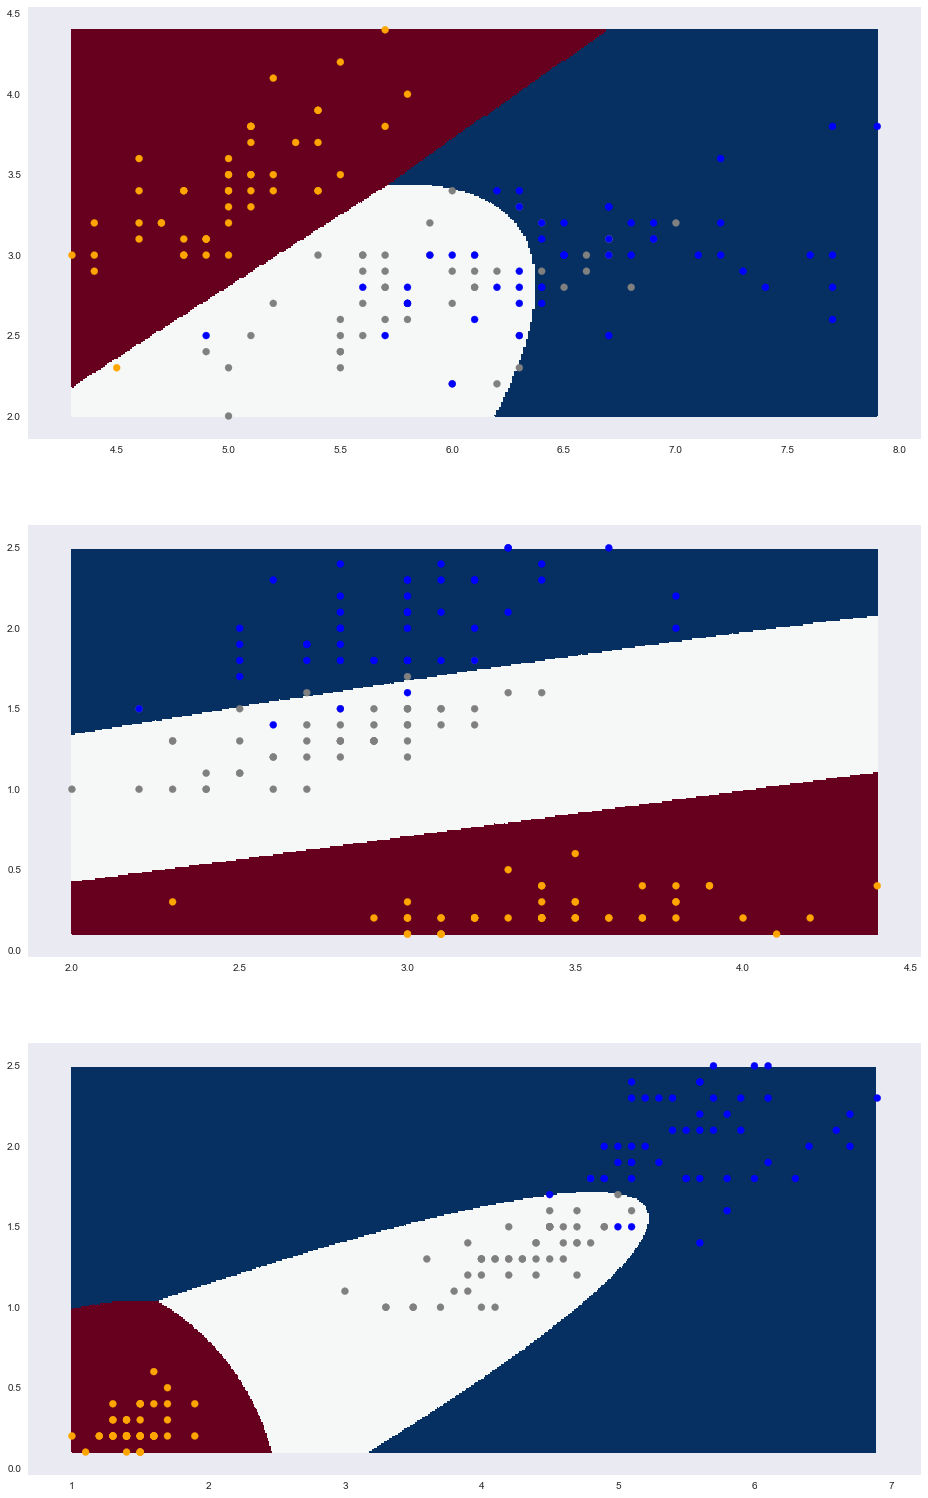

In [71]:
plt.figure(figsize=(16, 27))
for i, indexes in enumerate([(0, 1), (1, 3), (2, 3)]): 
    x_min, x_max, y_min, y_max = get_bounds(X[:, indexes[0]], X[:, indexes[1]])
    grid = np.mgrid[x_min:x_max:1e-2, y_min:y_max:1e-2]
    colors = get_image(grid, sps.multivariate_normal(*get_two_dim_density(mean_0, cov_0, *indexes)), 
              sps.multivariate_normal(*get_two_dim_density(mean_1, cov_1, *indexes)), 
              sps.multivariate_normal(*get_two_dim_density(mean_2, cov_2, *indexes)))
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], colors, cmap='RdBu')
    #plt.imshow(z, extent=get_bounds(X[:, indexes[0]], X[:, indexes[1]]))
    colors_map = ['orange', 'gray', 'blue']
    plt.scatter(X[:, indexes[0]], X[:, indexes[1]], 
                color=list(map(lambda y_once: colors_map[y_once], y)))
plt.show()

**Вывод:** Действительно, мы сделали большу работу. Самое главное, мы поняли, что классификация пространства по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$ -- это очень клевая штука!

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

EM-алгоритм -- алгоритм кластреризации данных. В основе этого алгоритма лежит предположение о том, что множество признаков может быть смоделировано смесью $k$ распределений (в частносм случае -- смесью многомерных нормальных распределений).

$$ p(x) = \sum \limits^{k}_{j = 1} w_j p_j(x), \ \ \sum \limits^{k}_{j = 1} w_j = 1, \ \ w_j \geq 0, $$

а $p_j(x)$ принадлежит параметрическому семейству $\varphi(x, \theta_j)$.

Нам нужно решить задачу разделения смеси, т.е. имея выборку $x^m$ оценить параметры $\Theta = (w_1, \dots, w_n, \theta_1, \dots, \theta_n)$.

Для смеси нормальных распределений оценивается вектор параметров  $\Theta = (w_1, \dots, w_n, \mu_1, \dots, \mu_n, \Sigma_1, \dots, \Sigma_n)$

В алгоритме вводится вспомогательный вектор скрытых переменных переменных $G$, такой, что:

1) Вектор $G$ может быть вычислен, если известны значения вектора параметров

2) Поиск максимума правдоподобия сильно упрощается, если известен вектор $G$

Действительно, максимизировать логарифм функции правдоподобия смеси распределений не очень клево, т.к. мы имеем дело с лографмом суммы, что является не самым приятным объектом для дифференцирования.

EM-алгоритм состоит из итерационного повторения двух шагов:

1) **E-шаг**  (expectation)

2) **M-шаг** (maximization)

Расмотрим их более подробно:

### E - шаг

На E-шаге вычисляет матожидание (ожидаемое значение) вектора скрытых переменных $G$ по текущему приближению вектора параметров $\Theta$.

$$p(x, \theta_j) = p(x)P(\theta_j | x) = w_jp_j(x)\ \ \ \  [*]$$

Пусть $g_{ij} := P(\theta_j | x_i) $  -- это вероятность того, что i-ый объект выборки получен из j-ой компоненты смеси. Возьмем эти перменные в качестве скртых. Зная их и используя форумулу $[*]$ мы легко найдем максимум логарифма функцию правдоподобия.

$\sum\limits_{j = 1}^{k} g_{ij} = 1$ -- т.к. это полная вероятность принадлежать i-ому объекту выборки некоторой компоненте смеси.

Воспользуемся формулой Байеса:

$$ g_{ij} = \dfrac{w_jp_j(x_i)}{\sum\limits^{k}_{s=1}w_sp_s(x_i)} $$

А что будет с элементами вектора скрытых переменных, если каждая компонента смеси имеет многомерное нормальное распределение?

Понятно, что нужно в формулу для $g_{ij}$ подставить плотность i-ого многомерного нормального распределения, параметры которого мы оценили на M-шаге (если шаг Е самый первый, то мы инициализируемся с каких-то стартовых оценок -- это зависит от реализации).

### M - шаг



На M шаге мы уже знаем оценку для вектора скрытых переменных и теперь достаточно легко уже можем решить задачу максимизации правдоподобия. Таким образом мы найдем новое значение $\Theta^{n+1}$ по значениям векторов $G$ и $\Theta^{n-1}$

Максимизируем логрифм функции правдопобия (выборка размера n)
$$\arg \max\limits_{\Theta}\mathcal{L}(\Theta) = \arg \max\limits_{\Theta} \sum\limits_{i = 1}^{n}  \ln p(x_i) = \arg \max\limits_{\Theta} \sum\limits_{i = 1}^{n} \ln \left(\sum\limits_{j = 1}^{k} w_jp_j(x_i) \right)$$

Сумму под логарифмом мы уже можем выразить через $g_{ij}$, посчитанным на прошлом E-шаге. Таким образом мы свели задачу к уже простой задаче максимизации логарифма функции правдоподобия. Решая такую оптимизационную задачу с ограничением на сумму весов $w_i$ получаем:

$$ w_j = \dfrac{1}{m} \sum\limits_{i = 1}^{m}g_{ij} $$
$$ \theta_j = \arg \max\limits_{\theta} \sum\limits_{i=1}^{m} g_{ij} \ln \varphi(x_i, \theta) $$

А для многомерного нормального:

$$ \mu^{new}_{j} \frac{1}{N_j} \sum \limits_{i=1}^{n} g_{ij} x_i, \ \ w_j = \frac{N_j}{n}, \ \  N_j = \sum \limits^{n}_{i = 1} g_{ij} $$

$$ \Sigma_j = \frac{1}{N_j} \sum \limits_{i=1}^{n} g_{ij} (x_i - \mu_i^{new})^{T}(x_i - \mu_i^{new}) $$

Поочередно делаем Е и М шаг, пока не будет достигнута сходимость (tol)

In [72]:
est = GaussianMixture(n_components=3, n_init=20, tol=1e-5, max_iter=1000, reg_covar=1.5e-2)
est.fit(X)
y_pred = est.predict(X)

Т.к. EM алгоритм выдавал свои метки классов, то вероятно, они могут не совпадать с нашими, поэтому попробуем потестить все перестановки меток и выдать наилучший скор, это и будет скором классификации EM алгоритма

In [73]:
scores = []
for permutation in itertools.permutations(range(3), 3):
    y_pred_perm = y_pred.copy()
    y_pred_perm[y_pred == 0] = permutation[0]
    y_pred_perm[y_pred == 1] = permutation[1]
    y_pred_perm[y_pred == 2] = permutation[2]
    scores.append(accuracy_score(y_pred_perm, y))
max(scores)

0.98666666666666669

А теперь проанализируем как ведет себя нижняя оценка логарифма функции правдоподобия.

In [74]:
est.lower_bound_

-1.3898870151390115

Из документации: ЕМ-алгоритм из sklearn проверяет условие сходимости именно для lower_bound_, а именно параметр tol, отвечающий за сходимость сразвнивается со средним lower_bound

Посмотрим, как `lower_bound_` зависит от количества итераций:

In [82]:
from tqdm import tqdm

  0%|          | 0/100 [00:00<?, ?it/s]//anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 20 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
100%|██████████| 100/100 [00:49<00:00,  1.59it/s]


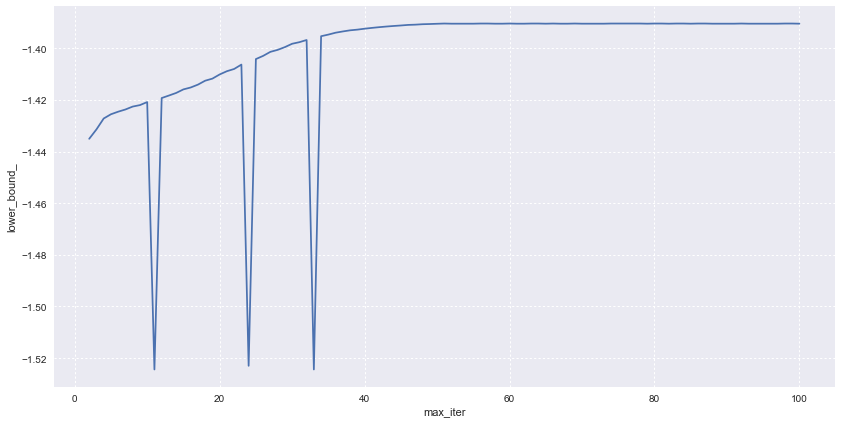

In [84]:
n_iters = np.linspace(2, 100, 100, dtype=int)
lower_bounds = []
for n_iter in tqdm(n_iters):
    est = GaussianMixture(n_components=3, n_init=20, 
                    tol=1e-4, max_iter=n_iter, reg_covar=1.5e-2)
    est.fit(X)
    lower_bounds.append(est.lower_bound_)
plt.figure(figsize=(14, 7))
plt.plot(n_iters, lower_bounds)
plt.grid(ls=":")
plt.ylabel("lower_bound_")
plt.xlabel("max_iter")
plt.show()

Из графиков видно, что для нашего набора данных EM-алгоритм сходится к глобалному минимуму уже при `max_iter=60`

В процессе построения графиков заметил, что при маленьком `n_init` у нас есть провалы в `lower_bound_`. Это означает, что мы сошлись к локальному, а не глобальному минимуму. При `n_init=20` такое встречается нечасто.